1. Data Exploration and Processing:

.Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import datetime
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

.Reading the Dataset

In [3]:
file_path = r'C:\Users\VIjay Andem\OneDrive\Desktop\Projects\Superstore Sales Analysis - EDA/Superstore Dataset.csv'  # Update this to the correct location
df = pd.read_csv(file_path, encoding='ISO-8859-1')


In [4]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


Checking the shape of Dataset

In [5]:
print("Data Shape: ", df.shape)

Data Shape:  (9994, 21)


Data Type and Missing Values of Each Column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Checking of Duplicate Rows

In [7]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0



Summary: Above observation shows that the there are no null values and duplicate rows. But the only problem is the data type of the Order Date and Ship Date columns that needs to be changed to date time format.

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Adding new Column (Delivery Delay)
df['Delivery Delay (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

2. Statistical Summary

Statistical Summary of Numerical Columns

In [9]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Delivery Delay (Days)
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,3.958175
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,3.000000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,4.000000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,5.000000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,7.000000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,1.747567



Note:

From above statistical description we can see that Sales and Profit columns have outliers.
Sales, Quantity, and Discount columns are right skewed.
The Data is very sparsed in the lowest and highest 25 percentiles of the Profit column.

Statistical Summary of Categorical Columns

In [10]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


Notes:
There is only 1 unique value in the Country column i.e. United States
The top row shows the most frequent values in each column.

3. Non-Graphical Analysis

Unique attributes and count of all Categorical Variables

In [11]:
cat_columns = df.select_dtypes(include='object').columns

for col in cat_columns:
    print(f"{col}: {df[col].value_counts()} counts", "\n")

Order ID: Order ID
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
US-2015-126977    10
                  ..
CA-2014-110422     1
CA-2016-125794     1
CA-2017-163566     1
US-2015-151435     1
CA-2016-130225     1
Name: count, Length: 5009, dtype: int64 counts 

Ship Mode: Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64 counts 

Customer ID: Customer ID
WB-21850    37
MA-17560    34
JL-15835    34
PP-18955    34
CK-12205    32
            ..
AO-10810     1
LD-16855     1
JR-15700     1
CJ-11875     1
RE-19405     1
Name: count, Length: 793, dtype: int64 counts 

Customer Name: Customer Name
William Brown          37
Matt Abelman           34
John Lee               34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Anthony O'Donnell       1
Lela Donovan            1
Jocasta Rupert          1
Carl Jackson            1
Ricardo Emerson         1


4. Graphical Analysis

Univariate Analysis - Numerical Features

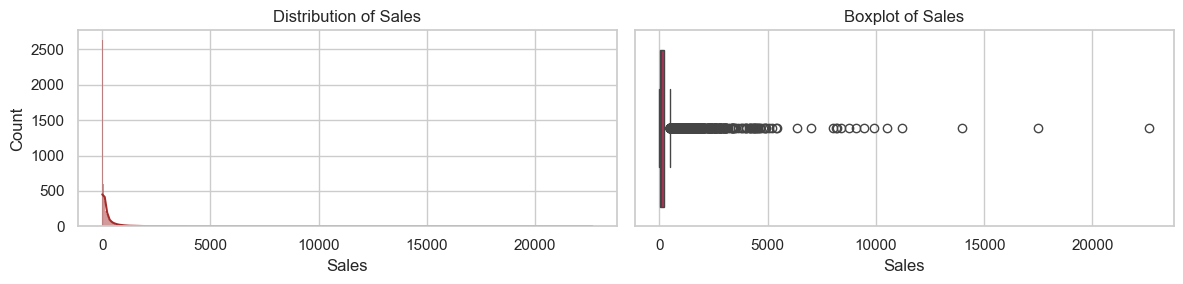

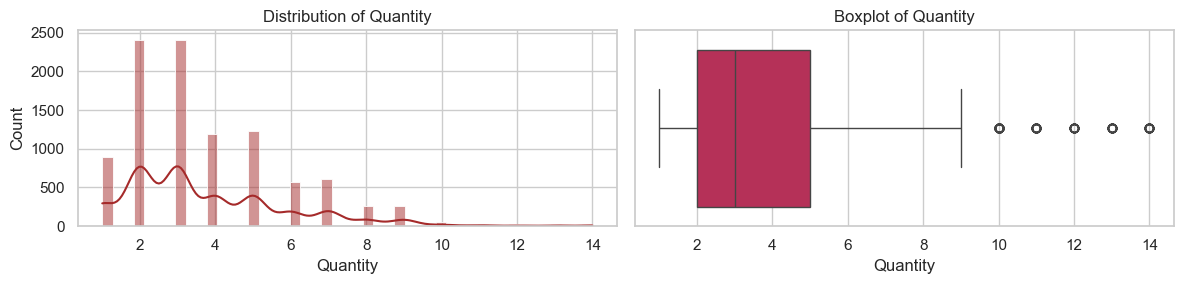

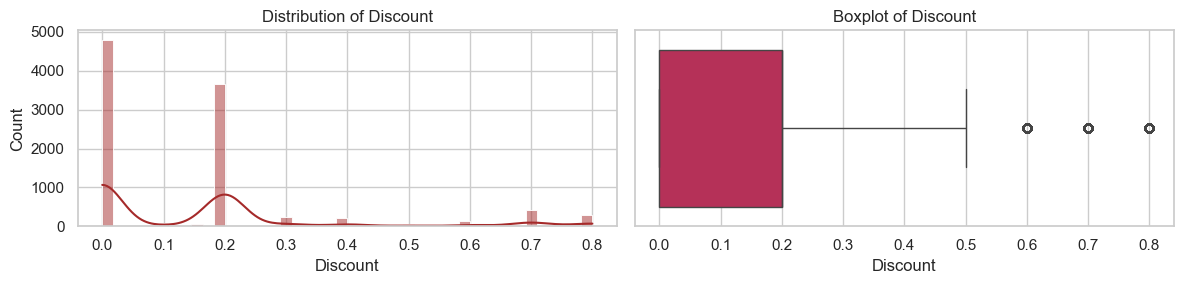

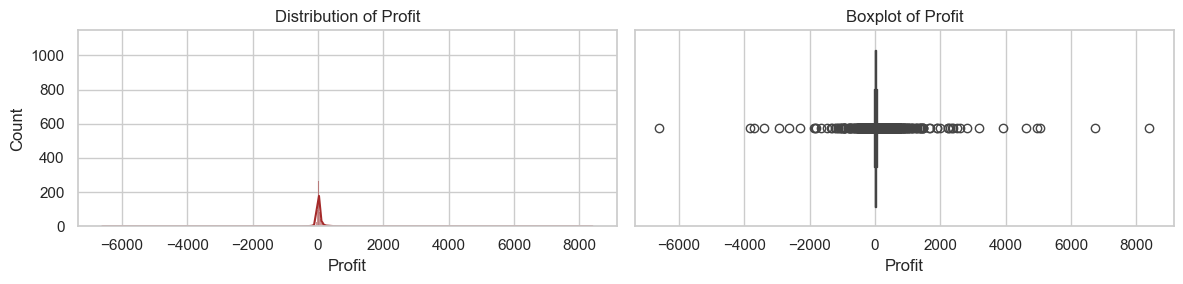

In [12]:
numerical = ['Sales', 'Quantity', 'Discount', 'Profit']

for col in numerical:
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))  # 1 row, 2 columns

    # Histogram with KDE
    sns.histplot(df[col], kde=True, color = 'brown', ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')

    # Boxplot
    sns.boxplot(x=df[col], palette = 'rocket', ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


Note:

Sales, Quantity, and Discount columns are right skewed.
The Data is very sparsed in the lowest and highest 25 percentiles of the Profit column.

Univariate Analysis - Categorical Features

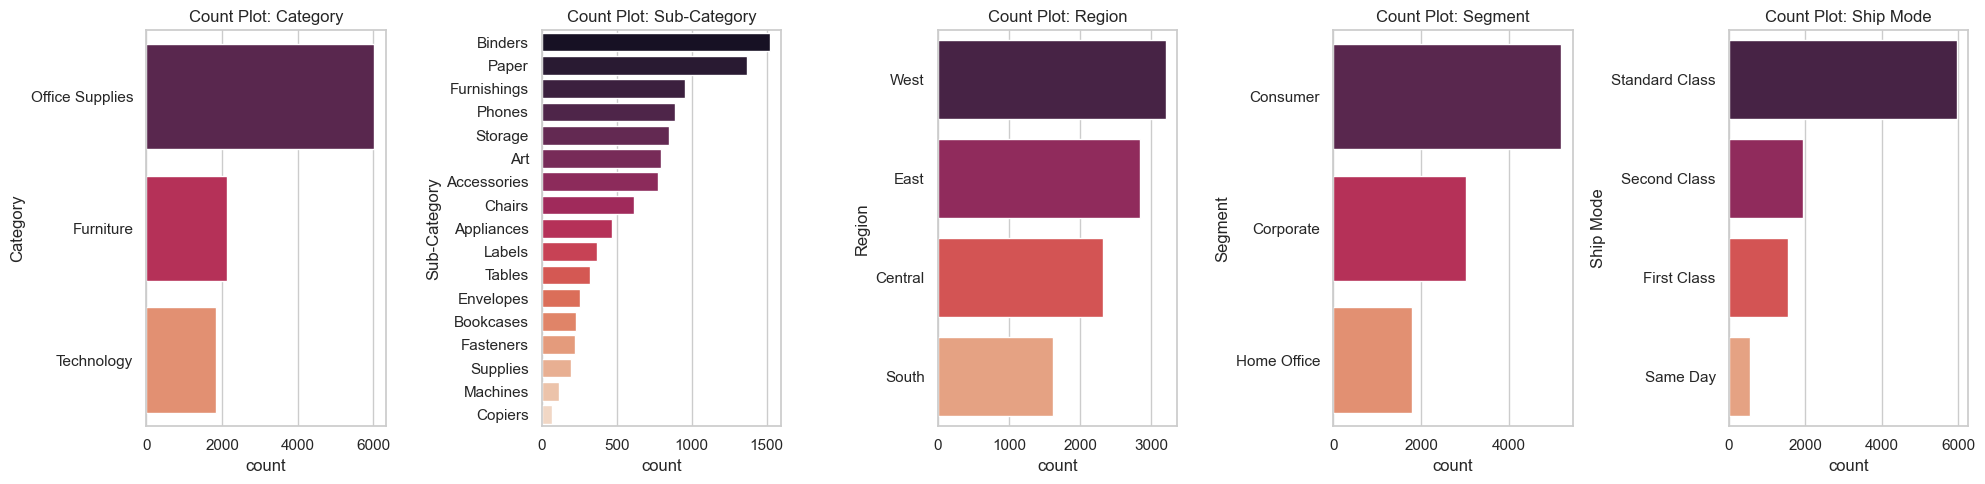

In [13]:
categorical = ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode']

fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # 1 row, 5 columns

for i, col in enumerate(categorical):
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette = 'rocket', ax=axes[i])
    axes[i].set_title(f'Count Plot: {col}')

plt.tight_layout()
plt.show()

Note:
Sub-Category-wise highest Number of Orders are comming from the Binders sub-category followed by Papers and Frunishings.
Region-wise highest Number of Orders are comming from the West region followed by East, Central and South.
Segment-wise highest Number of Orders are comming from the Conusmer segment followed by Corporate and Home Office.
Ship Mode-wise highest Number of Orders are comming through the Standard Class Ship mode followed by Second Class, First Class and Same Day.

5. Bivariate Analysis

Exploring how different features affect Sales/Profit¶


Sales vs Category / Sub-Category:

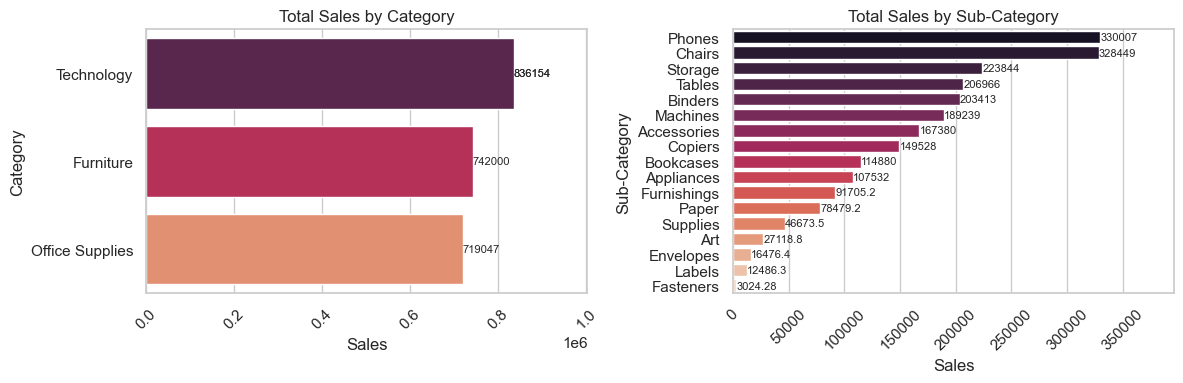

In [14]:
fig, axes = plt.subplots(1,2, figsize = (12, 4))

df_grouped = df.groupby('Category')['Sales'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Sales', ascending=False)
ax1 = sns.barplot(data=df_sorted, y=df_sorted['Category'], x=df_sorted['Sales'], palette='rocket', errorbar=None, ax = axes[0])
for container in ax1.containers:
  ax1.bar_label(container, fontsize=8)
ax1.margins(x=0.2)
ax1.bar_label(ax1.containers[0], fontsize=8)
axes[0].set_title("Total Sales by Category")
axes[0].tick_params(axis='x', rotation=45)


df_grouped = df.groupby('Sub-Category')['Sales'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Sales', ascending=False)
ax2 = sns.barplot(data=df_sorted, y=df_sorted['Sub-Category'], x=df_sorted['Sales'], palette='rocket', errorbar=None, ax = axes[1])
for container in ax2.containers:
  ax2.bar_label(container, fontsize=8)
ax2.margins(x=0.2)

axes[1].set_title("Total Sales by Sub-Category")
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


Note:

Technology is the top selling category with total sales of $836,154.

Phones, Chairs and Storage are the top 3 selling Sub_Category with total sales of USD 330007, USD 328449, and USD 223844 respectively.

Profit vs Discount:

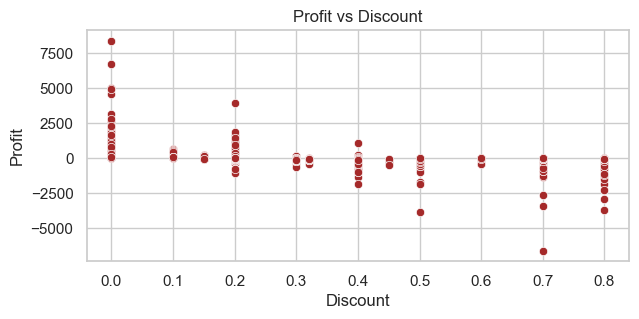

In [15]:
plt.figure(figsize=(7,3))
sns.scatterplot(data=df, x='Discount', y='Profit', color='brown')
plt.title('Profit vs Discount')
plt.show()


Note:

Overall Profit and discount shows negative Correlation.
Discount value of 0.1 to 0.4 result into both profit and loss.
Discount value of above 0.4 has no profit but loss.

Profit Vs Sales

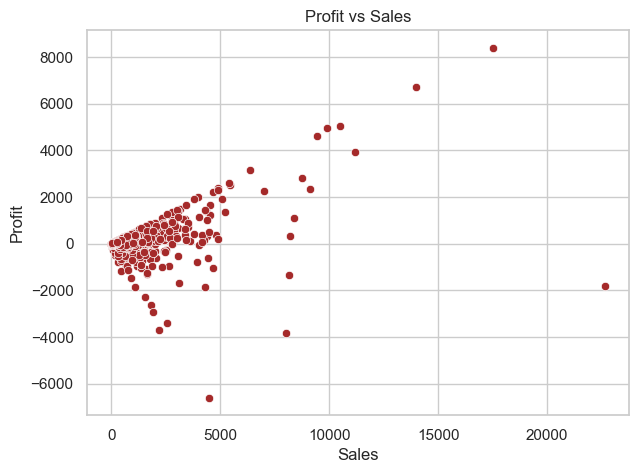

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Sales', y='Profit', color='brown')
plt.title('Profit vs Sales')
plt.show()


Note:

Profit and Sales has no corrrelation.

Profit Vs Category/Sub-Category

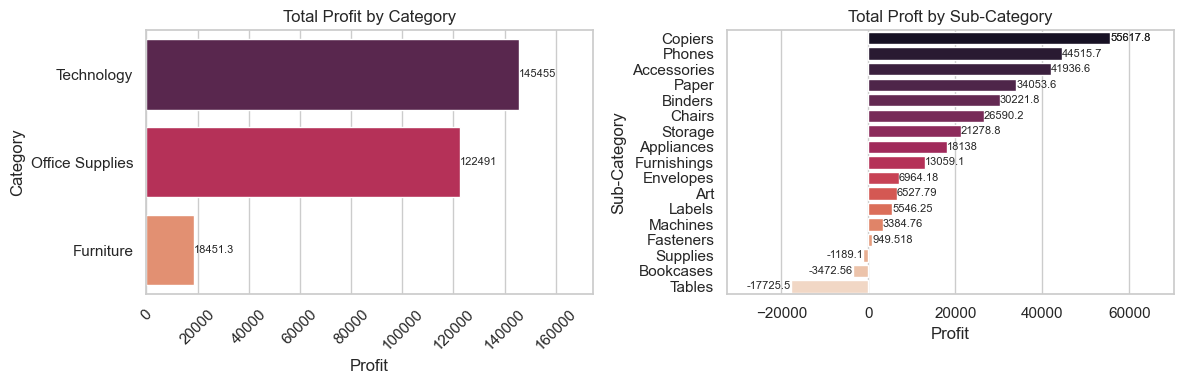

In [17]:
fig, axes = plt.subplots(1,2, figsize = (12, 4))

df_grouped = df.groupby('Category')['Profit'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Profit', ascending=False)
ax1 = sns.barplot(data=df_sorted, y=df_sorted['Category'], x=df_sorted['Profit'],palette='rocket', errorbar=None, ax = axes[0])
for container in ax1.containers:
  ax1.bar_label(container, fontsize = 8)
ax1.margins(x=0.2)
axes[0].set_title("Total Profit by Category")
axes[0].tick_params(axis = 'x', rotation = 45)


df_grouped = df.groupby('Sub-Category')['Profit'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Profit', ascending=False)
ax2 = sns.barplot(data=df_sorted, y=df_sorted['Sub-Category'], x=df_sorted['Profit'],palette='rocket', errorbar=None, ax = axes[1])
ax2.bar_label(ax2.containers[0],fontsize= 8)
for container in ax2.containers:
  ax2.bar_label(container, fontsize = 8)
ax2.margins(x=0.2)
axes[1].set_title("Total Proft by Sub-Category")


plt.tight_layout()
plt.show()


Note:

Technology is the most profitable category.
Despite Furniture being the 2nd most sold category its Least Profitable Category.

Copiers, Phones and Accessories are the top 3 profitable Sub-Categories while Labels, Machines and Fasteners are the least profitable.

Supplies, Bookcases, and Tables are the loss-making Sub-Categories
Despite Tables being the 4th most selling Sub-Category is the highest loss-making.

Profit VS Segment

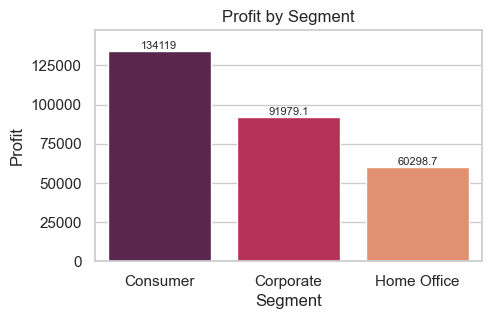

In [18]:
plt.figure(figsize=(5,3))
ax = sns.barplot(data=df, x='Segment', y='Profit', estimator='sum', palette='rocket', errorbar = None)
for container in ax.containers:
  plt.bar_label(container, fontsize=8)

ax.margins(y=0.1)
plt.title("Profit by Segment")
plt.show()

Consumer is the most profitable Segment with a total profit of USD 134,119 followed by Corporate and Home Office segments with USD 91,979 and USD 60,298 profits respectively.

Profit VS Region/State

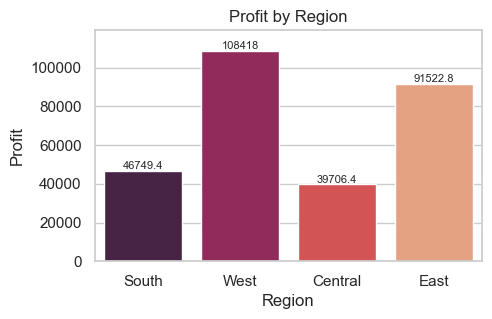

In [19]:
plt.figure(figsize=(5,3))

ax = sns.barplot(data=df, x='Region', y='Profit', estimator='sum', palette='rocket', errorbar=None)

for container in ax.containers:
  plt.bar_label(container, fontsize=8)

ax.margins(y=0.1)

plt.title('Profit by Region')
plt.show()


Note:

West is the Most Profitable Region with a total profit of USD 108,418 followed by East, South and Central with total profits of USD 91,522, USD 46,749 and USD 39,706 respectively.

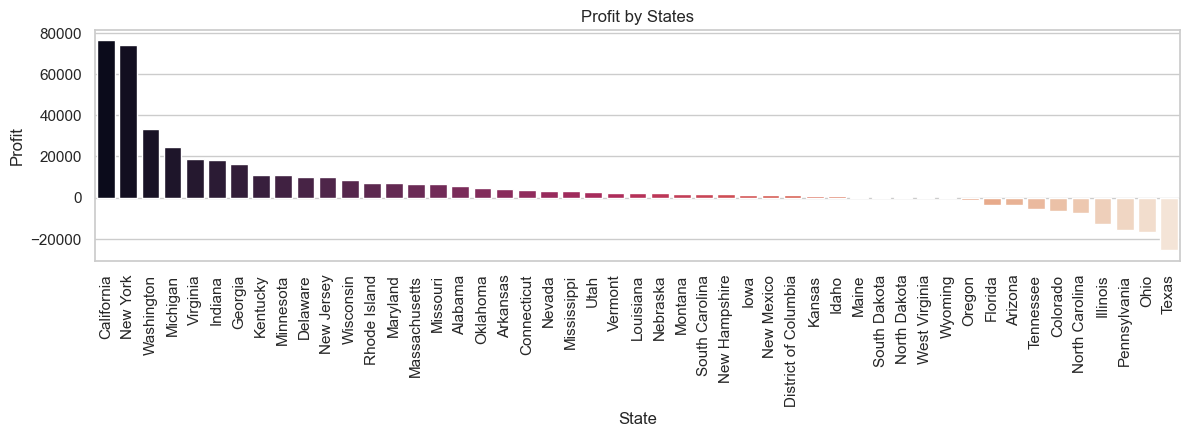

In [20]:
plt.figure(figsize=(14,3))
df_grouped = df.groupby('State')['Profit'].sum().reset_index()
df_sorted = df_grouped.sort_values('Profit', ascending = False)
ax = sns.barplot(data=df, x=df_sorted['State'], y=df_sorted['Profit'], palette='rocket')

plt.title('Profit by States')
plt.tick_params(axis='x', rotation = 90)
plt.show()


Note:

California, New York and Washington are the top 3 profitable States while Dakota, Vest Virginia and Wyoming are the least profitable.
Oregon, Florida, Arizona, Tennessee, Colorado, North Carolina, Illinois, Pennsylvania, Ohio and Texas are the loss-making States

Profit VS Ship Mode

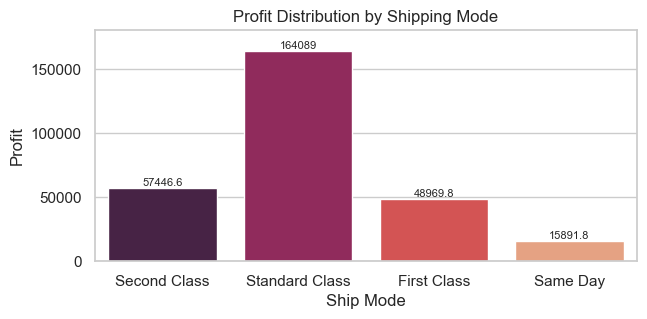

In [21]:
plt.figure(figsize=(7,3))

ax = sns.barplot(data=df, x='Ship Mode', y='Profit', estimator='sum', palette='rocket', errorbar=None)
plt.title('Profit Distribution by Shipping Mode')

for container in ax.containers:
  plt.bar_label(container, fontsize=8)

ax.margins(y=0.1)

plt.show()


Note:

Standard Class is the Most Profitable Shipping Mode with a total profit of USD 164,089 followed by Second Class, First Class and Same Day with total profits of USD 57,447, USD 48,970 and USD 15,891 respectively.

Profit VS Quantity

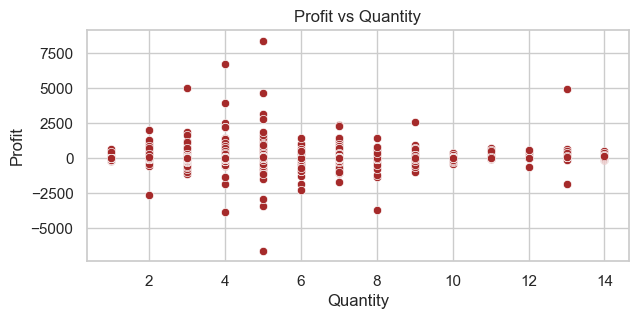

In [22]:
plt.figure(figsize=(7,3))
sns.scatterplot(data=df, x='Quantity', y='Profit', color='brown')
plt.title('Profit vs Quantity')
plt.show()


Note:

Profit and Quantity has No Correlation.

Profit VS Product Name

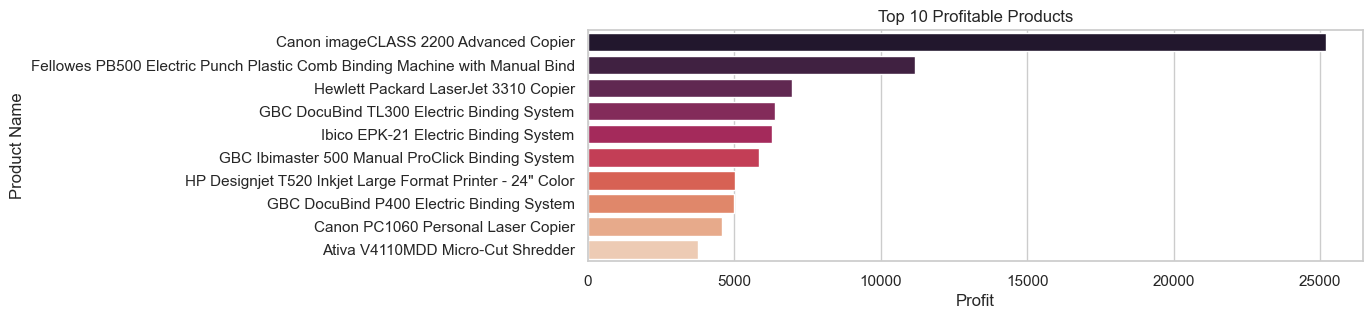

In [23]:
loss_products = df[df['Profit'] < 0] # Loss-Making Orders
profitable_products = df[df['Profit'] > 0]

top10 = profitable_products.groupby('Product Name')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False).head(10)
bottom10 = profitable_products.groupby('Product Name')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False).tail(10)
Toploss10 = loss_products.groupby('Product Name')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False).tail(10)

plt.figure(figsize=(10,3))
sns.barplot(data=top10, x = top10['Profit'], y=top10['Product Name'], palette='rocket')
plt.title('Top 10 Profitable Products')
plt.show()

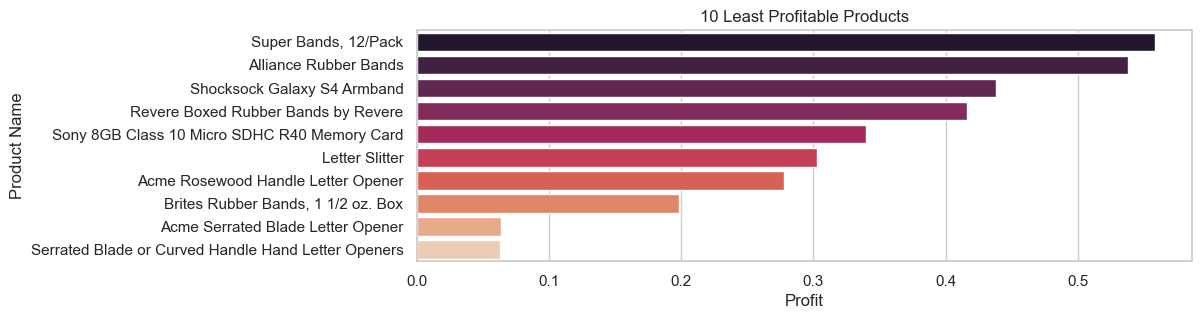

In [24]:
plt.figure(figsize=(10,3))
sns.barplot(data=bottom10, x = bottom10['Profit'], y=bottom10['Product Name'], palette='rocket')
plt.title('10 Least Profitable Products')
plt.show()

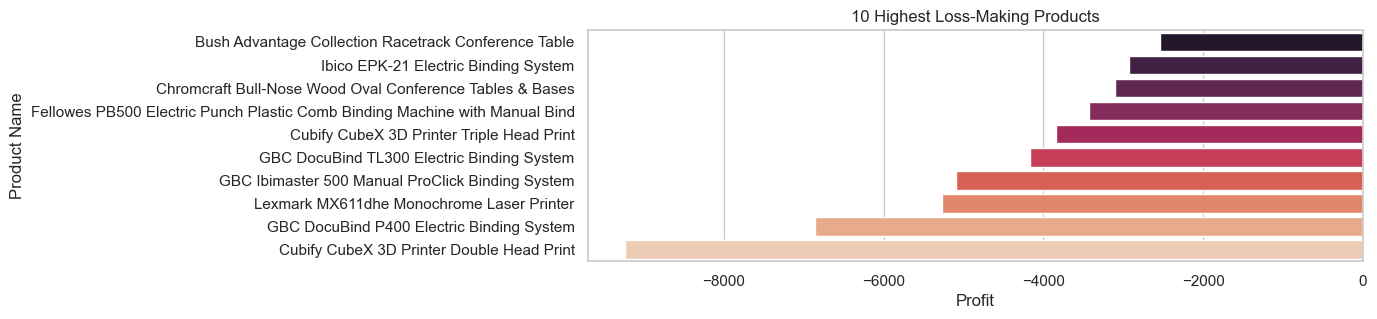

In [25]:
plt.figure(figsize=(10,3))
sns.barplot(data=Toploss10, x = Toploss10['Profit'], y=Toploss10['Product Name'], palette='rocket')
plt.title('10 Highest Loss-Making Products')
plt.show()

6. Multivariate Analysis

Segment + Region vs Profit: Identify high-performing segments within each region.

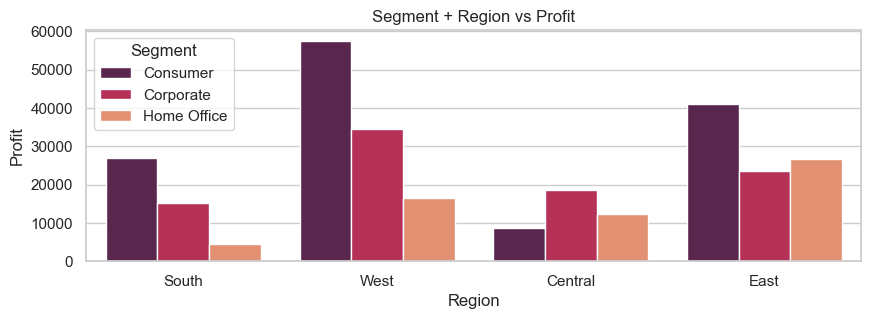

In [26]:
plt.figure(figsize=(10,3))
sns.barplot(data=df, x='Region', y='Profit', hue='Segment',estimator='sum', palette='rocket', errorbar=None)
plt.title('Segment + Region vs Profit')

plt.show()


Note:

Consumer is the most profitable segment in the South, East, and West regions.
In the Central region Corporate is the most profitable segment but Consumer is the least profitable segment.

Category + Discount vs Profit: Analyze how discounts affect profitability across categories.

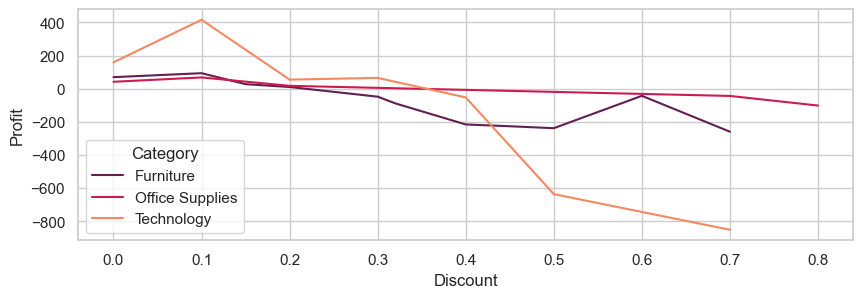

In [27]:
plt.figure(figsize=(10,3))
sns.lineplot(data=df, x='Discount', y='Profit', hue='Category', estimator='mean', palette='rocket', errorbar=None)
plt.show()


Note:

Overall Profit decreases with increase in discount in all Categories.
Technology Category achieve highest profits with 10 % Discount.
Technology and Office Supplies turn into loss-making categories when discounts exceed 35%.
Furniture becomes a loss-making category when the discount goes beyond 22%.

Segment + Ship Mode vs Sales/Profit: Understand how different segments use shipping methods and their associated performance.

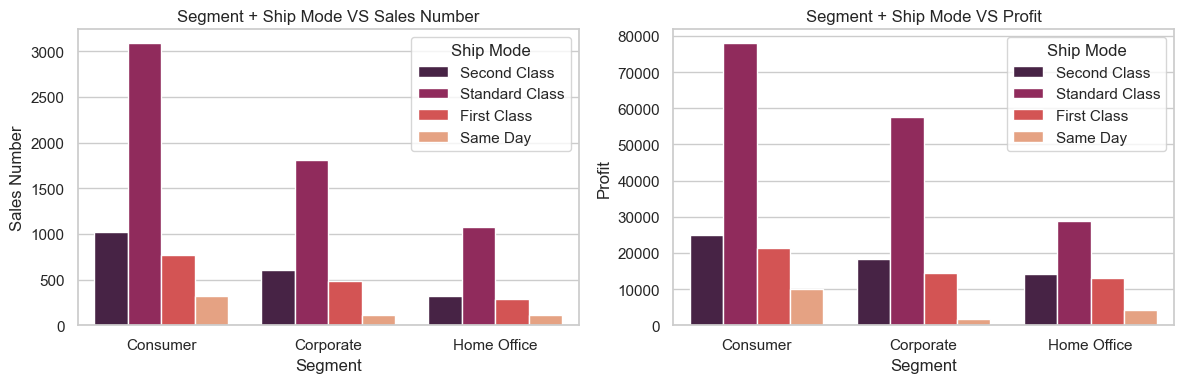

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

ax1 = sns.barplot(data=df, x='Segment', y='Sales', hue='Ship Mode',estimator='count', palette='rocket', errorbar=None, ax=axes[0])
ax2 = sns.barplot(data=df, x='Segment', y='Profit', hue='Ship Mode',estimator='sum', palette='rocket', errorbar=None, ax=axes[1])

ax1.set_title('Segment + Ship Mode VS Sales Number')
ax2.set_title('Segment + Ship Mode VS Profit')

ax1.set_ylabel('Sales Number')

plt.tight_layout()
plt.show()


Note:

There is a consistent pattern across all segments in the use of different ship modes. Standard Class is the most frequently used, followed by Second Class, then First Class, with Same Day being the least used.
In terms of performance (profitability), the trend remains the same, with Standard Class generating the highest profit and Same Day the lowest.

Sub-Category + Region vs Profit (or Profit Margin) : Find which sub-categories are strong in each region. (profit margin = Profit/Sales)

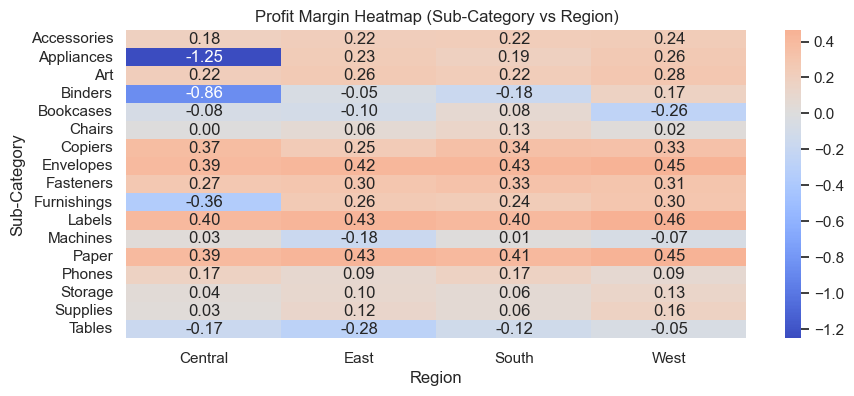

In [29]:
df['Profit Margin'] = df['Profit']/df['Sales']

pivot_table = df.pivot_table(index='Sub-Category', columns='Region', values='Profit Margin', aggfunc='mean')

plt.figure(figsize=(10,4))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Profit Margin Heatmap (Sub-Category vs Region)')
plt.show()


Note:

In the Central Region Labels is the strongest sub-category with profit margin of 0.40.
In the East Region Labels and Paper are the strongest sub-category with profit margin of 0.43.
In the South Region Envelopes is the strongest sub-category with profit margin of 0.43.
In the West Region Labels is the strongest sub-category with profit margin of 0.46.




Time (Month/Year) + Category vs Profit: Analyze seasonal or time-based trends in category-level performance.

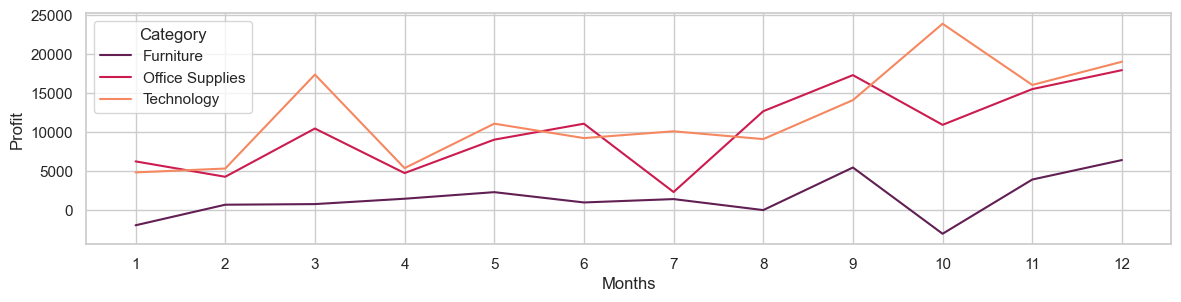

In [30]:
plt.figure(figsize=(14, 3))
sns.lineplot(data=df, x=df['Order Date'].dt.month, y='Profit', hue='Category', estimator='sum', palette='rocket', errorbar=None)
plt.xticks(df['Order Date'].dt.month.unique())
plt.xlabel('Months')
plt.show()


Note:

Overall the Profit has positive trend from January to December for all Categories.
For Technology, Profit peaks in October and falls to its lowest point in January.
For Office Supplies, Profit peaks in December and falls to its lowest point in July.
For Furniture, Profit peaks in December and falls to its lowest point in Octuber recording a loss.

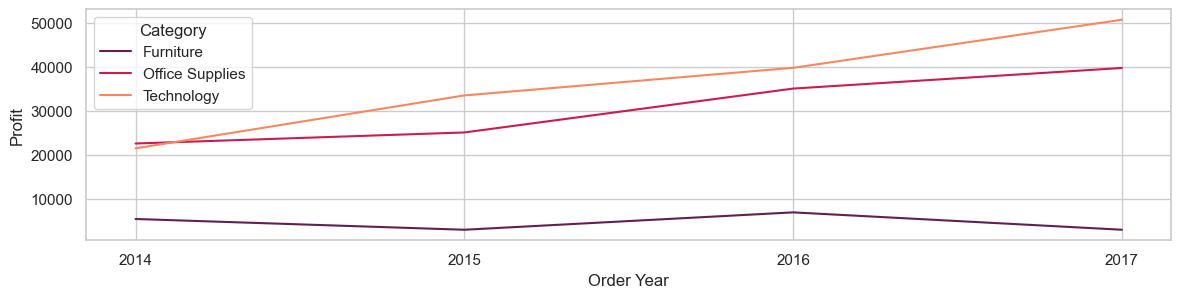

In [31]:
df['Order Year'] = df['Order Date'].dt.year

plt.figure(figsize=(14,3))
sns.lineplot(data=df, x='Order Year', y='Profit', hue='Category', estimator='sum', palette='rocket', errorbar=None)
plt.xticks(df['Order Year'].unique())
plt.show()


Note:

Year over Year the Profit increases for Technology and Office Supplies.
The Profit for the Furniture category remained relatively consistent across each year.

Region + Ship Mode + Profit: Analyze if some shipping modes are more efficient/profitable in certain regions.

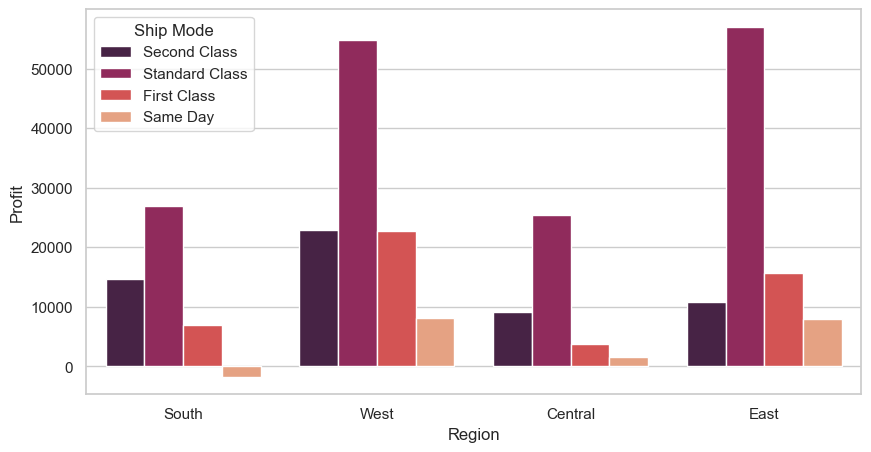

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Region', y='Profit', hue='Ship Mode',estimator='sum',palette='rocket', errorbar=None)
plt.show()


Note:

In all region the most Profitable ship mode is the Standard Class.
Same Day ship mode is the loss making for South Region.

Pairplot of Sales, Profit, Discount, and Quantity (Colored by Segment or Category)

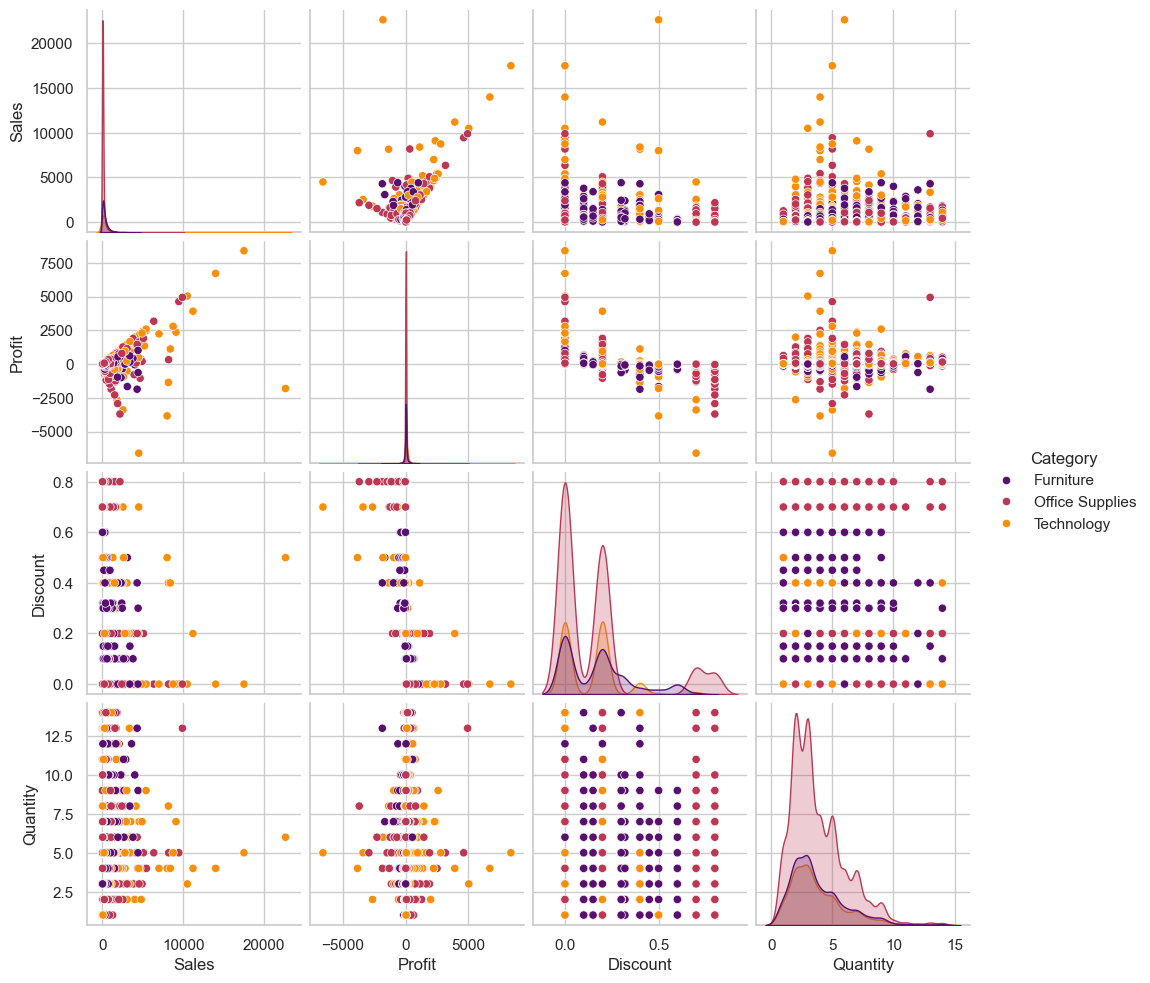

In [33]:
sns.pairplot(df[['Sales', 'Profit', 'Discount', 'Quantity', 'Category']], hue='Category', palette='inferno')
plt.show()

7. Correlation Analysis

Display a correlation matrix using a heatmap

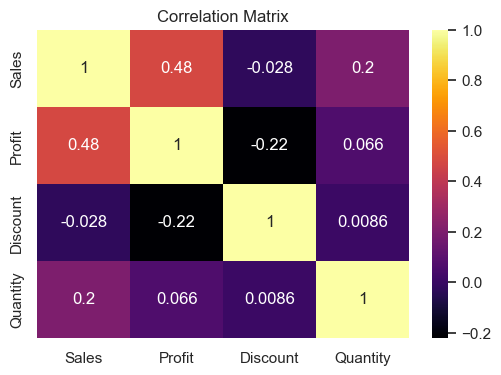

In [34]:
corr = df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='inferno')
plt.title('Correlation Matrix')
plt.show()


Note:

Sales has a weak postive correlation with profit and Quantity.
Profit has a weak negative correlation with Discount.

8. Outlier Detection

Use the IQR method or boxplots to detect outliers.

In [35]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR))]
print("Number of Potential Sales Outliers:", outliers.shape[0])

Number of Potential Sales Outliers: 1167


In [36]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Profit'] < (Q1 - 1.5 * IQR)) | (df['Profit'] > (Q3 + 1.5 * IQR))]
print("Number of Potential Profit Outliers:", outliers.shape[0])

Number of Potential Profit Outliers: 1881


In [37]:
Q1 = df['Discount'].quantile(0.25)
Q3 = df['Discount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Discount'] < (Q1 - 1.5 * IQR)) | (df['Discount'] > (Q3 + 1.5 * IQR))]
print("Number of Potential Discount Outliers:", outliers.shape[0])

Number of Potential Discount Outliers: 856


In [38]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Quantity'] < (Q1 - 1.5 * IQR)) | (df['Quantity'] > (Q3 + 1.5 * IQR))]
print("Number of Potential Quantity Outliers:", outliers.shape[0])

Number of Potential Quantity Outliers: 170


Note:

IQR-based outliers = potential outliers They are a good starting point for flagging unusual data points, but further investigation is always recommended before treating them as errors or removing them.

9. Conditional Analysis

What percentage of orders come from each segment and region?

In [39]:
print(df['Segment'].value_counts(normalize=True) * 100)
print("")
print(df['Region'].value_counts(normalize=True) * 100)
print("")

Segment
Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: proportion, dtype: float64

Region
West       32.049230
East       28.497098
Central    23.243946
South      16.209726
Name: proportion, dtype: float64



What are the average sales and profit per segment across different regions?

In [40]:
print(df.groupby(['Region', 'Segment'])[['Sales', 'Profit']].mean())
print("")

                          Sales     Profit
Region  Segment                           
Central Consumer     207.946728   7.066046
        Corporate    234.763466  27.791831
        Home Office  208.248046  28.398202
East    Consumer     238.875539  28.040153
        Corporate    228.516929  26.935666
        Home Office  253.911805  53.205611
South   Consumer     233.390180  32.116435
        Corporate    238.992025  29.833771
        Home Office  272.996329  16.987626
West    Consumer     217.033955  34.360409
        Corporate    235.265911  35.872323
        Home Office  239.442692  28.949939



How does discount level affect profitability across different categories?

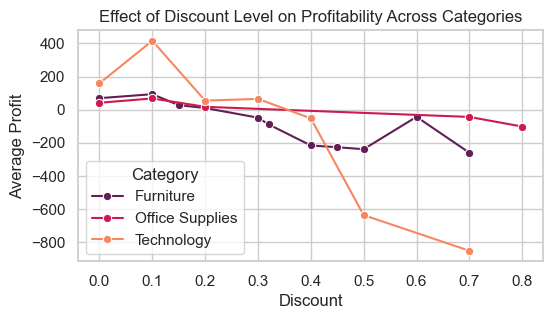

In [41]:
result = df.groupby(['Category', 'Discount'])['Profit'].mean().reset_index()

plt.figure(figsize=(6,3))
sns.lineplot(data=result, x='Discount', y='Profit', hue='Category', marker='o',palette='rocket')
plt.title('Effect of Discount Level on Profitability Across Categories')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.grid(True)
plt.show()


Note: Profitability generally decreases as the discount level increases across all three categories—Furniture, Office Supplies, and Technology.

Furniture: Profit peaks at a 10% discount but declines sharply beyond 15%, turning negative from 30% onward, with the worst losses at 70%.

Office Supplies: Profit is highest at a 10% discount, drops significantly at 20%, and becomes negative at higher discount levels (70% and 80%).

Technology: Profit surges at a 10% discount (highest among all), then declines, becoming negative beyond 30%, with heavy losses at 50% and 70%.

While small discounts (around 10%) can boost profits, higher discounts drastically reduce profitability, especially in the Technology and Furniture categories.

What percentage of high discount orders (>30%) result in negative profit?

In [42]:
# Filter orders with Discount > 30%
high_discount = df[df['Discount'] > 0.3]

# Calculate percentage
negative_profit_pct = ((high_discount['Profit'] < 0).sum() / len(high_discount)) * 100

print(f"Percent of high-discount orders with loss: {negative_profit_pct:.2f}%")

Percent of high-discount orders with loss: 97.77%


What percentage of customers are repeat buyers, and how do they differ in spending patterns?

In [43]:
# Get number of unique customers
total_customers = df['Customer ID'].nunique()

# Get customers who appear more than once
customers_hist = df['Customer ID'].value_counts()

repeat_customers = customers_hist[customers_hist > 1].count()

# Calculate percentage
repeat_customer_pct = (repeat_customers / total_customers) * 100

print(f"Repeat customer %: {repeat_customer_pct:.2f}%")

Repeat customer %: 99.37%


Which sub-categories have the highest loss percentage compared to sales?

In [44]:
# Group sales and profit by Sub-Category
loss_subcat = df.groupby('Sub-Category')[['Sales', 'Profit']].sum()

# Calculate Loss % (Profit/Sales * 100)
loss_subcat['Loss %'] = (loss_subcat['Profit'] / loss_subcat['Sales']) * 100

# Focus only on sub-categories with negative profit
loss_subcat = loss_subcat[loss_subcat['Profit'] < 0]

# Sort by Loss % (ascending, more negative first)
loss_subcat = loss_subcat.sort_values('Loss %')

# Display top loss-making sub-categories
print(loss_subcat)

                    Sales      Profit    Loss %
Sub-Category                                   
Tables        206965.5320 -17725.4811 -8.564460
Bookcases     114879.9963  -3472.5560 -3.022768
Supplies       46673.5380  -1189.0995 -2.547695



Note:

Tables have the highest loss percentage at -8.56%, indicating a significant loss relative to their total sales.

What is the probability of receiving a profit/loss given a discount rate?

In [45]:
# Step 1: Create a Profit/Loss Label
df['Profit/Loss'] = df['Profit'].apply(lambda x: 'Profit' if x >= 0 else 'Loss')

# Step 2: Group by Discount and Profit/Loss
discount_profit_loss = df.groupby(['Discount', 'Profit/Loss']).size().reset_index(name='Count')

# Step 3: Total orders per Discount
discount_total = df.groupby('Discount').size().reset_index(name='Total')
# print(discount_total)

# Step 4: Merge and calculate probability
discount_profit_loss = discount_profit_loss.merge(discount_total, on='Discount')
discount_profit_loss['Probability (%)'] = (discount_profit_loss['Count'] / discount_profit_loss['Total']) * 100

# Step 5: Display nicely
print(discount_profit_loss)

    Discount Profit/Loss  Count  Total  Probability (%)
0       0.00      Profit   4798   4798       100.000000
1       0.10        Loss      4     94         4.255319
2       0.10      Profit     90     94        95.744681
3       0.15        Loss     17     52        32.692308
4       0.15      Profit     35     52        67.307692
5       0.20        Loss    502   3657        13.727099
6       0.20      Profit   3155   3657        86.272901
7       0.30        Loss    208    227        91.629956
8       0.30      Profit     19    227         8.370044
9       0.32        Loss     27     27       100.000000
10      0.40        Loss    180    206        87.378641
11      0.40      Profit     26    206        12.621359
12      0.45        Loss     11     11       100.000000
13      0.50        Loss     66     66       100.000000
14      0.60        Loss    138    138       100.000000
15      0.70        Loss    418    418       100.000000
16      0.80        Loss    300    300       100


Note:

Discount rate of 0% has a Profit Probability of 100% followed by 10% and 20% discount rates with profit probabilities of 96% and 86% respectively
above 40% and 32% has a Loss probability of 100% followed by 30% and 40% discount rates with loss probabilities of 91% and 87% respectively.

Among unprofitable orders, which categories or regions dominate?

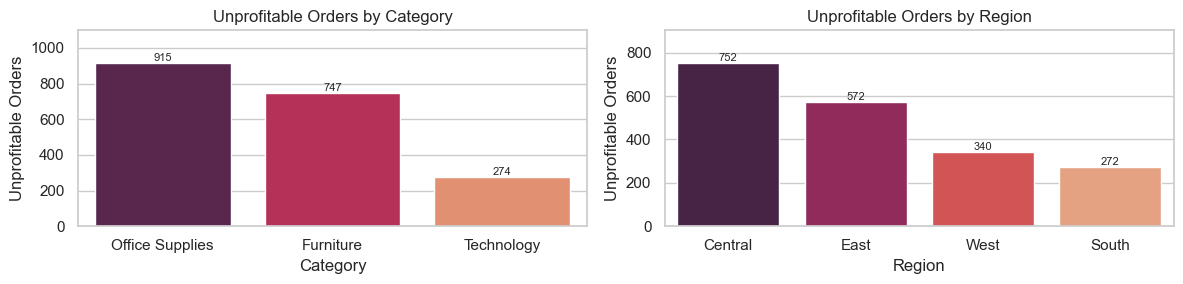

In [46]:
# Step 1: Filter unprofitable orders
unprofitable_orders = df[df['Profit'] <= 0]

# Step 2a: Unprofitable by Category
unprofitable_by_category = unprofitable_orders['Category'].value_counts().reset_index()
unprofitable_by_category.columns = ['Category', 'Unprofitable Orders']

# Step 2b: Unprofitable by Region
unprofitable_by_region = unprofitable_orders['Region'].value_counts().reset_index()
unprofitable_by_region.columns = ['Region', 'Unprofitable Orders']

# Step 3: Display
fig, axes = plt.subplots(1,2, figsize=(12,3))
ax1 = sns.barplot(unprofitable_by_category, x=unprofitable_by_category['Category'], y=unprofitable_by_category['Unprofitable Orders'], palette='rocket', ax=axes[0])
ax1.set_title('Unprofitable Orders by Category')

for container in ax1.containers:
  ax1.bar_label(container, fontsize = 8)
ax1.margins(y=0.2)

ax2 = sns.barplot(unprofitable_by_region, x=unprofitable_by_region['Region'], y=unprofitable_by_region['Unprofitable Orders'], palette='rocket', ax=axes[1])
ax2.set_title('Unprofitable Orders by Region')

for container in ax2.containers:
  ax2.bar_label(container, fontsize = 8)
ax2.margins(y=0.2)

plt.tight_layout()
plt.show()